# CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

# STEP 0: PROBLEM STATEMENT

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



# STEP 1: IMPORT LIBRARIES AND DATASET

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [82]:
mainclass={0:'Speed limit (20km/h)',1:'Speed limit (30km/h)',
           2:'Speed limit (50km/h)',3: 'Speed limit (60km/h)',
           4:'Speed limit (70km/h)',5: 'Speed limit (80km/h)',
           6:'End of speed limit (80km/h)',7:'Speed limit (100km/h)',
           8:'Speed limit (120km/h)',9:'No passing',
           10:'No passing for vehicles over 3.5 metric tons',
           11:'Right-of-way at the next intersection',12:'Priority road',
           13:'Yield',14:'Stop',15:'No vehicles',
           16:'Vehicles over 3.5 metric tons prohibited',17:'No entry',
           18:'General caution',19:'Dangerous curve to the left',
           20:'Dangerous curve to the right',21:'Double curve',
           22:'Bumpy road',23:'Slippery road',
           24:'Road narrows on the right',25:'Road work',
           26:'Traffic signals',27:'Pedestrians',28:'Children crossing',
           29:'Bicycles crossing',30:'Beware of ice/snow',
           31:'Wild animals crossing',
           32:'End of all speed and passing limits',33:'Turn right ahead',
           34:'Turn left ahead',35:'Ahead only',36:'Go straight or right',
           37:'Go straight or left',38:'Keep right',39:'Keep left',
           40:'Roundabout mandatory',41:'End of no passing',
           42:'End of no passing by vehicles over 3.5 metric tons'}

In [4]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [5]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
# training data
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
# validation dataset is used to simply avoid overfitting which means to avoid a ratu popat means 
#it fails to generalize and access the progress of network during training

with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)
# test our trained network and all the images are not been seen by the network in training

In [6]:
x_train, y_train = train['features'], train['labels']
# features is the input of network and labels is the target clas
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']


In [7]:
x_train.shape
# 32 by 32 and depth of network is 3 which is we have 3 channels the RGB 

(34799, 32, 32, 3)

In [8]:
y_train.shape
# each image in the input had 34799 output

(34799,)

In [9]:
x_validation.shape

(4410, 32, 32, 3)

In [10]:
y_validation.shape

(4410,)

In [11]:
train['labels']

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

# STEP 2: IMAGE EXPLORATION

(11, 'Right-of-way at the next intersection')

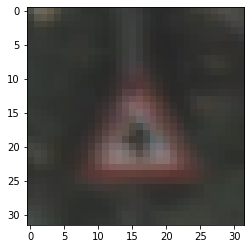

In [12]:
i = 9000
plt.imshow(x_train[i]) # Show images are not shuffled
y_train[i],mainclass[y_train[i]]

# STEP 3: DATA PEPARATION

In [13]:
# Data normalization means changing the range of values from 0-200 to 0-1 
#convert the colored image to grapscale image
# grayscale speeds up network and changes the number of channel from 3-D or 3 channels to 
# 1-D or single channel

In [14]:
## Shuffle the dataset to change the order
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)


In [15]:
# average the pixel to change to graysacle
X_train_gray = np.sum(x_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(x_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(x_validation/3, axis=3, keepdims=True) 

In [16]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128
# subtract and divide by 128 is to kind of get the central values within the pixels

In [17]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

Beware of ice/snow


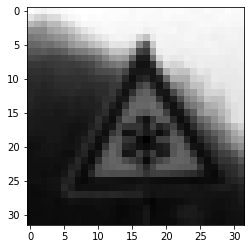

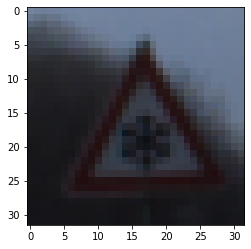

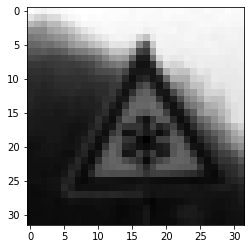

In [18]:
#squeeze is used to remove the 32,32,1 
#the 1 from that as we don't need it
# cmap is color map
i = 1000
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
# plt. figure to create new figure below grayscale
plt.figure()
plt.imshow(x_train[i])
print(mainclass[y_train[i]])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray')

Wild animals crossing


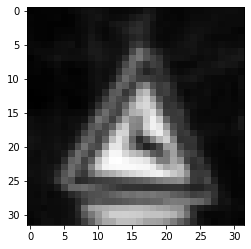

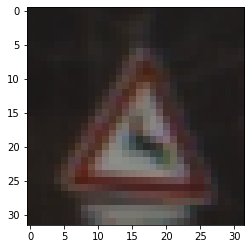

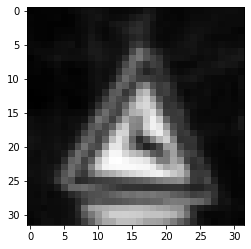

In [19]:
i = 100
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
# plt. figure to create new figure below grayscale
plt.figure()
plt.imshow(x_validation[i])
print(mainclass[y_validation[i]])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(),cmap='gray')

# STEP 4: MODEL TRAINING

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [49]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [50]:
image_shape = X_train_gray[i].shape
image_shape

(32, 32, 1)

In [51]:
# Dense is used to create the fully connected layer
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(MaxPooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))
# we use softmax or sigmoid to get answer for categorical variable
cnn_model.add(Dense(units=43, activation = 'softmax'))


In [91]:
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_11 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_12 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_17 (Dense)             (None, 84)               

In [52]:
#categorical_crossentropy because we have multiple classes
# binary entropy if we had 2 classes
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.00009),metrics =['accuracy'])

In [53]:
# verbose means how much information  u want to display
# as network is being train
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=512,
                        nb_epoch=200,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/200
34799/34799 [==============================] - 5s 147us/step - loss: 3.7144 - accuracy: 0.0587 - val_loss: 3.6491 - val_accuracy: 0.0587
Epoch 2/200
34799/34799 [==============================] - 5s 141us/step - loss: 3.4884 - accuracy: 0.1085 - val_loss: 3.5020 - val_accuracy: 0.1159
Epoch 3/200
34799/34799 [==============================] - 7s 204us/step - loss: 3.2829 - accuracy: 0.1594 - val_loss: 3.3800 - val_accuracy: 0.1651
Epoch 4/200
34799/34799 [==============================] - 7s 210us/step - loss: 3.0670 - accuracy: 0.2178 - val_loss: 3.1818 - val_accuracy: 0.2086
Epoch 5/200
34799/34799 [==============================] - 7s 209us/step - loss: 2.7937 - accuracy: 0.2889 - val_loss: 2.9434 - val_accuracy: 0.2501
Epoch 6/200
34799/34799 [==============================] - 7s 196us/step - loss: 2.5276 - accuracy: 0.3394 - val_loss: 2.7099 - val_accuracy: 0.3054
Epoch 7/200
34799/34799 [==============================] 

In [55]:
history.history['accuracy'][-1]

0.967614

# STEP 5: MODEL EVALUATION

In [56]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.7836


In [57]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

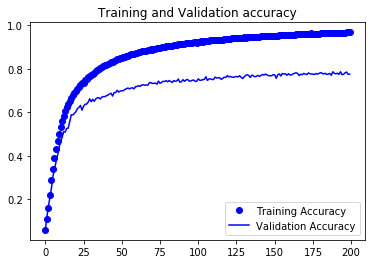

In [59]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


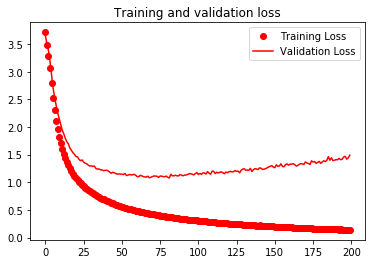

In [60]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [61]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


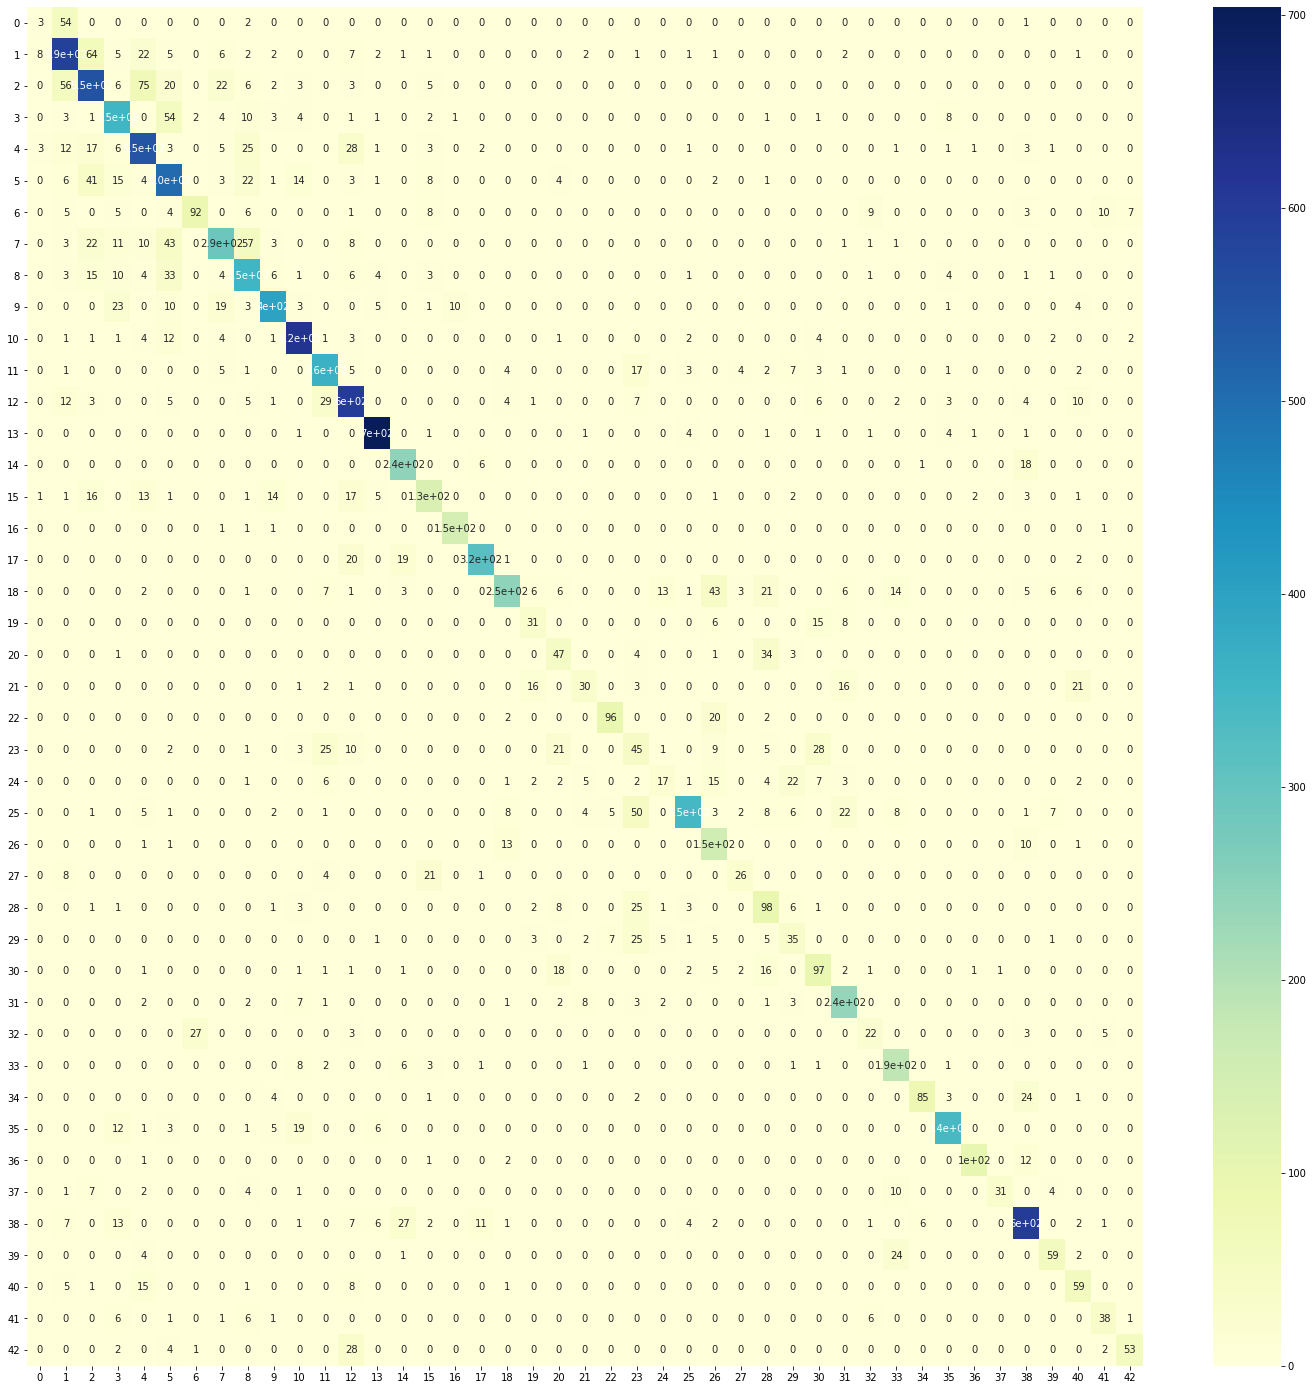

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
heat_map=sns.heatmap(cm, annot=True,cmap="YlGnBu")
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.show()

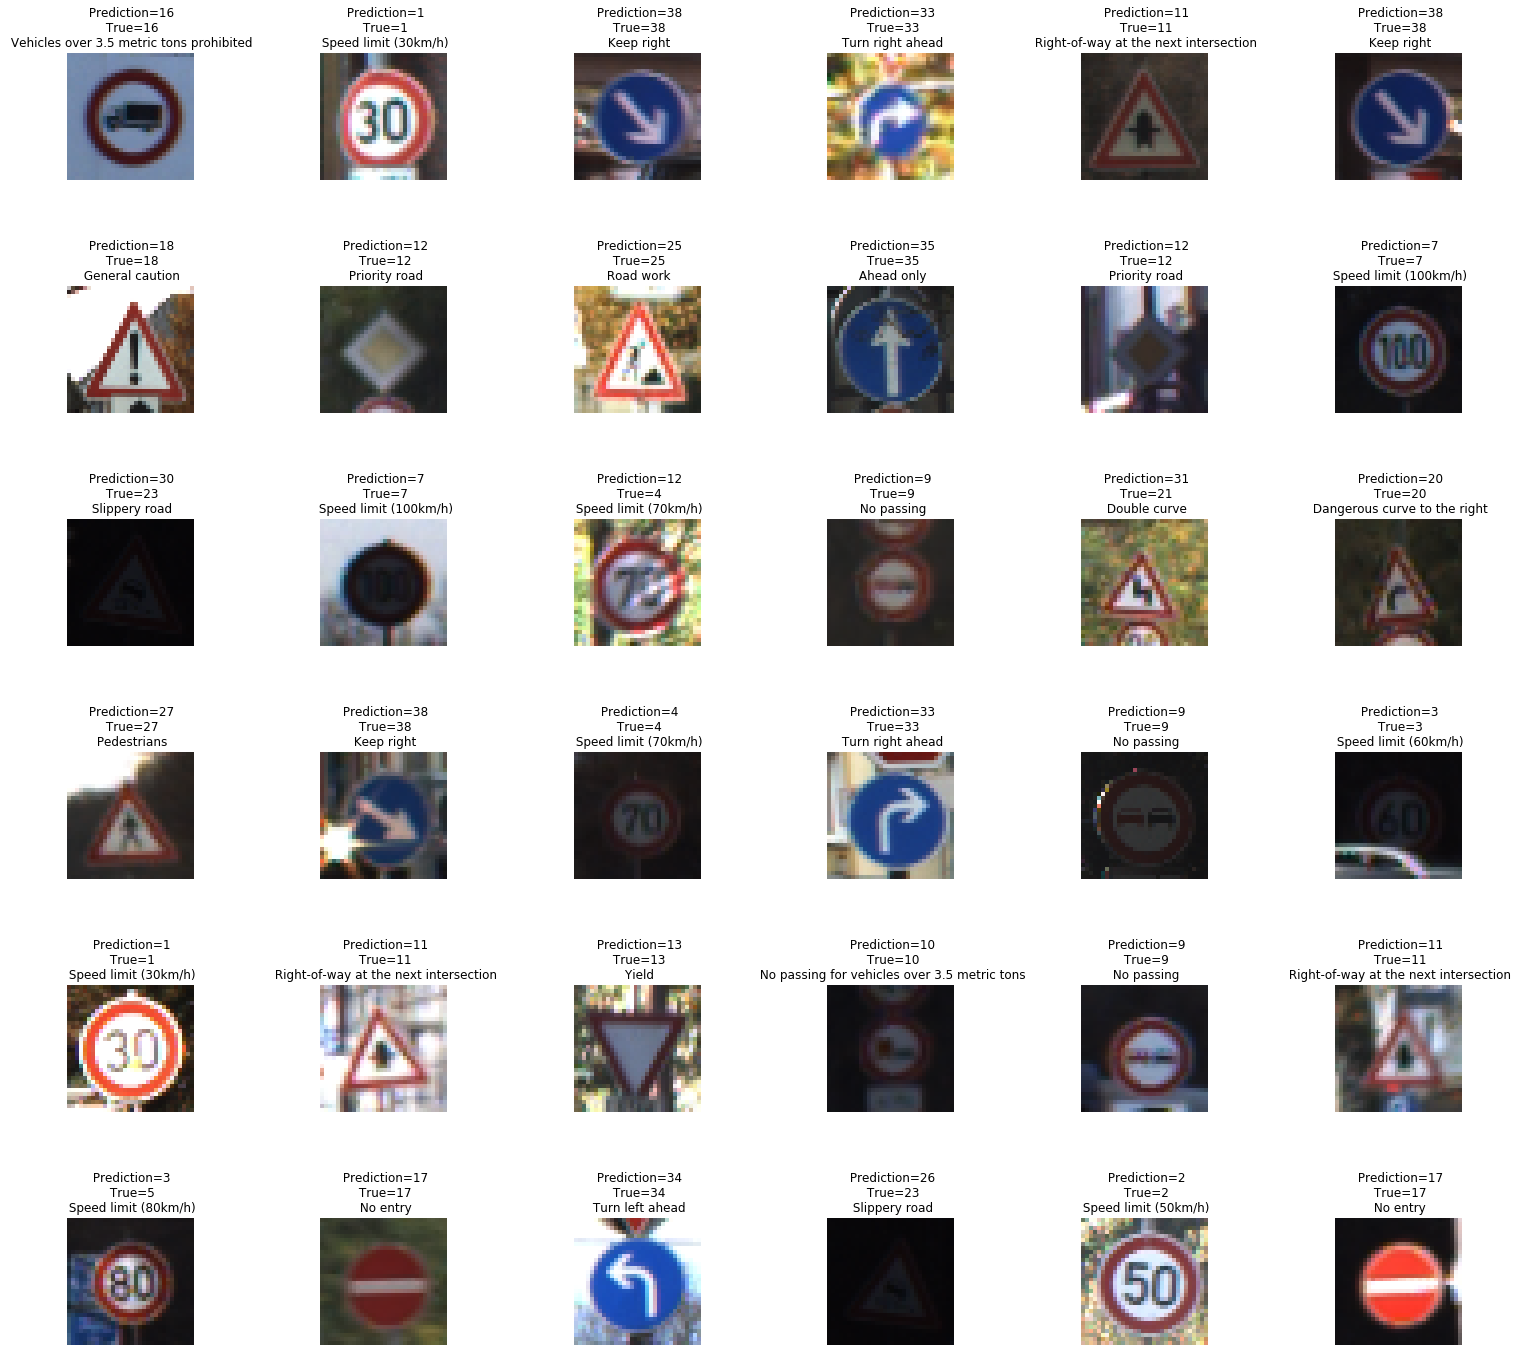

In [90]:
L = 6
W = 6
fig, axes = plt.subplots(L, W, figsize = (25,25))
axes = axes.ravel() # 

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title(" Prediction={}\n True={}\n {}".format(predicted_classes[i], y_true[i],mainclass[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()

# GREAT JOB! NOW YOU'VE MASTERED CNNS TRAINING USING KERAS!